In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
import tensorflow as tf

#### Loading Data

In [98]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [99]:
X_train = train.drop(['label'], axis=1)
y_train = train.label

##### Checking if data is biased

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

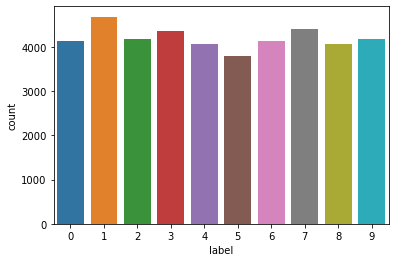

In [100]:
sns.countplot(y_train)

#### Checking for missing data

In [101]:
X_train.isnull().any().sum()

0

In [102]:
y_train.isnull().any().sum()

0

#### Normalizing the data
Essential for any deep learning model

In [103]:
X_train = X_train/255.0

#### Reshaping the data

In [104]:
X_train = X_train.values.reshape(-1, 28, 28, 1)

### Label Encoding
Since the values are not ordinal, they are One Hot Encoded

In [105]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes=10)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state=7)

### Data Augmentation

In [107]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10, zoom_range=0.2, height_shift_range=0.1, width_shift_range=0.1)
datagen.fit(X_train)

### Defining CNN Model

In [108]:
cnn = keras.models.Sequential()

In [109]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[28, 28, 1]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[28, 28, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [110]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [111]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [112]:
rms = tf.keras.optimizers.RMSprop(learning_rate=0.001)

In [113]:
cnn.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
cnn.fit(x=X_train, epochs=7)

Epoch 1/7


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 861, in train_step
        self._validate_target_and_loss(y, loss)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 818, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=categorical_crossentropy, and therefore expects target data to be provided in `fit()`.
